In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Project_vision"

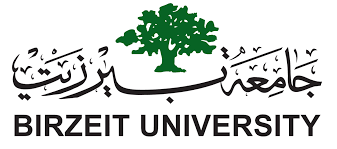


**Department of Electrical & Computer Engineering**

**First Semester, 2023/2024**

**ENCS5343 - Computer Vision**

**---> Project**

--------------------------

**Prepared by :**

**Hidaya Mustafa -  1201910**

**Rana Odeh -  1201750**


**Instructor : Aziz Qaroush**

**Section : 2**


# **<div id="chap1">Introduction</div>**

Handwriting recognition, which is a computer vision task that converts handwritten text into a machine-readable format. It focuses on the challenges and complexity of Arabic Handwritten Character Recognition (AHCR), which is influenced by the writing direction, character shapes, and connectivity of Arabic script.

In this project , we will explore the use of Convolutional Neural Networks (CNNs),  Inspired by the human visual system a type of deep learning model, for AHCR. CNNs have shown remarkable performance in various computer vision tasks, such as image classification, object detection, and face recognition. CNNs consist of multiple layers that learn to extract features from the input images and classify them into different categories. We will learn how to build a basic CNN for AHCR, and how to improve it using advanced techniques, such as data augmentation, pre-trained models, and deeper architectures.

# **<div id="chap1">Dataset</div>**

The dataset used is the [Arabic Handwritten Characters Dataset], which contains 16,800 images of 28 Arabic letters, divided into 13,440 training images and 3,360 test images. Each image is 32x32 pixels and has a single channel (grayscale).


# **<div id="chap1">Procedure</div>**

## Load library :

In [8]:
# import some libraries
import csv # import the csv module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from tensorflow import keras
from keras.models import Sequential
from tensorflow.python.keras.utils.all_utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout,Activation,AveragePooling2D
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from keras.models import load_model
from keras.metrics import top_k_categorical_accuracy
import h5py

## Load Data :

In [9]:
# Reading training and testing data from CSV files
image_train =pd.read_csv("/content/drive/MyDrive/Project_vision/csvTrainImages 13440x1024.csv", header=None)
lable_train =pd.read_csv('/content/drive/MyDrive/Project_vision/csvTrainLabel 13440x1.csv', header=None)
image_test =pd.read_csv('/content/drive/MyDrive/Project_vision/csvTestImages 3360x1024.csv', header=None)
lable_test = pd.read_csv('/content/drive/MyDrive/Project_vision/csvTestLabel 3360x1.csv', header=None)

# Converting data frames to NumPy arrays
image_train = image_train.iloc[:,:].values
image_test = image_test.iloc[:,:].values
lable_train = lable_train.iloc[:,:].values
lable_test = lable_test.iloc[:,:].values

# Reshaping image data and performing normalization
image_train = image_train.reshape(-1,32,32,1)
image_test = image_test.reshape(-1,32,32,1)
image_train = image_train / 255.0
image_test = image_test / 255.0
# Determining the total number of classes and converting labels to categorical format
total_classes = len(np.unique(lable_train))+1
lable_train = to_categorical(lable_train,total_classes)
lable_test = to_categorical(lable_test, total_classes)

## <font color='black'>3.1 Task 1:</font>
In this task, we build and train a custom convolutional neural network (CNN) for Arabic handwritten character recognition (AHCR).  A CNN can learn hierarchical features from images by applying multiple layers of convolution and pooling operations. To build a custom CNN, we need to define its architecture, layer parameters, and training hyperparameters. We also need to evaluate the performance of model on a dataset of Arabic handwritten characters using various metrics such as loss and accuracy. The goal of this task is to design and train a CNN that can achieve high accuracy on AHCR while avoiding overfitting and minimizing computational costs.

The model is trained for 40 epochs with a batch size of 128.

### <font color='black'>3.1.2 Module A:</font>

First test we created a simple Convolutional Neural Network (CNN) consists of the following layers:

-  Conv2D layer with 64 filters, each of size 3x3, that applies a convolution operation to the input image. This layer uses 'same' padding, which means that the output has the same height and width as the input. The activation function is ReLU, which stands for Rectified Linear Unit, and it returns the positive part of its argument.

-  AveragePooling2D layer with a pool size of 2x2, that reduces the spatial dimensions of the input by taking the avg value in each 2x2 window. This layer helps to reduce the number of parameters and prevent overfitting.

- Another Conv2D layer with 128 filters, each of size 2x2, that applies a convolution operation to the output of the previous layer. This layer also uses 'same' padding and tanh activation.

- A Flatten layer that reshapes the output of the previous layer into a one-dimensional vector. This layer prepares the data for the Dense layers.

- A Dense layer with neurons equal to the total number of classes in the dataset, and softmax activation. This layer is the output layer of the model, and it performs multi-class classification by assigning a probability to each class. The softmax function ensures that the sum of the probabilities is 1. The kernel_regularizer argument adds a L2 penalty to the weights of the layer, which helps to prevent overfitting by reducing the magnitude of the weights.

You have compiled the model with categorical crossentropy loss, Adam optimizer, and accuracy metric.

The loss function measures how well the model predicts the true labels of the images.

The optimizer updates the weights of the model based on the gradient of the loss function.

The metric evaluates the performance of the model during training and testing.


In [10]:
# Creating a Convolutional Neural Network (CNN) model A
modela = Sequential([
    # First Convolutional Layer with 32 filters, kernel size 3x3, 'same' padding, and ReLU activation
    Conv2D(64, 3, padding='same', activation='relu', input_shape=(32, 32, 1)),

    # AvgPooling layer with pool size 2x2
    AveragePooling2D(2, 2),

    # Second Convolutional Layer with 64 filters, kernel size 3x3, 'same' padding, and ReLU activation
    Conv2D(128, 2, padding='same', activation='tanh'),

    # Flattening the output for input to Dense layers
    Flatten(),

    # Output Dense layer with neurons equal to total number of classes and softmax activation for multi-class classification
    Dense(total_classes, activation='softmax',kernel_regularizer=l2(0.01))
])

# Compiling the model with categorical crossentropy loss, sgd optimizer, and accuracy metric
modela.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/40
105/105 [==============================] - 5s 12ms/step - loss: 2.4795 - accuracy: 0.3520 - val_loss: 1.9494 - val_accuracy: 0.4705
Epoch 2/40
105/105 [==============================] - 1s 8ms/step - loss: 1.7160 - accuracy: 0.5589 - val_loss: 1.5460 - val_accuracy: 0.6083
Epoch 3/40
105/105 [==============================] - 1s 9ms/step - loss: 1.4550 - accuracy: 0.6474 - val_loss: 1.3986 - val_accuracy: 0.6560
Epoch 4/40
105/105 [==============================] - 1s 9ms/step - loss: 1.3414 - accuracy: 0.6823 - val_loss: 1.3127 - val_accuracy: 0.7048
Epoch 5/40
105/105 [==============================] - 1s 9ms/step - loss: 1.2638 - accuracy: 0.7056 - val_loss: 1.2494 - val_accuracy: 0.7063
Epoch 6/40
105/105 [==============================] - 1s 10ms/step - loss: 1.2116 - accuracy: 0.7187 - val_loss: 1.1975 - val_accuracy: 0.7155
Epoch 7/40
105/105 [==============================] - 1s 9ms/step - loss: 1.1646 - accuracy: 0.7371 - val_loss: 1.1643 - val_accuracy: 0.7378
Epoc

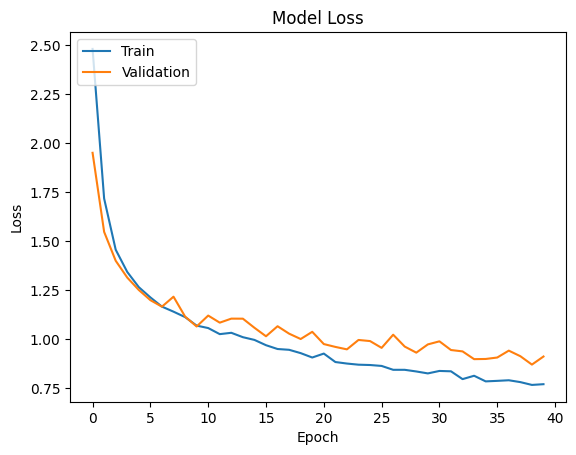

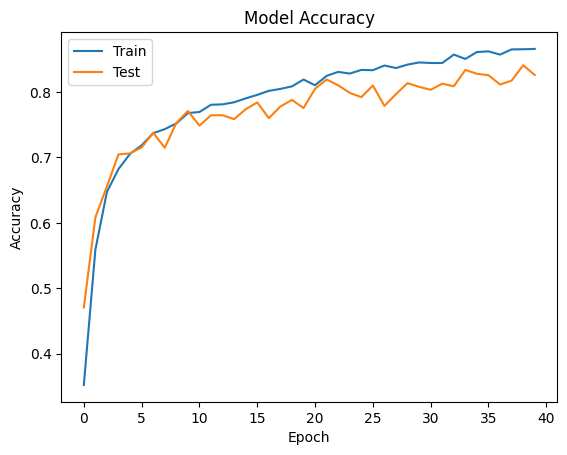

In [11]:
# Training the model using the training data and labels
history2 = modela.fit(image_train, lable_train, batch_size=128, epochs=40, verbose=1, validation_data=(image_test, lable_test))

# Evaluating the model on the test data
loss, accuracy = modela.evaluate(image_test, lable_test, batch_size=128)
print('Test loss:', loss * 100, '%')
print('Test accuracy:', accuracy * 100, '%')

# Plotting training and validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plotting training and validation accuracy values
plt.figure()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


The test results show a trend toward positivity, but they are not sufficiently good. Notably, the use of a can be blamed for the significant loss rate that was seen. The neural network architecture's use of an unsuitable parameters is the cause.

### <font color='black'>3.1.1 Module B:</font>

We also try editing a model with different parameters in another test.






In [12]:
model = Sequential([
    # First Convolutional Layer with 32 filters, kernel size 3x3, 'same' padding, and ReLU activation
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32, 32, 1)),

    # MaxPooling layer with pool size 2x2
    MaxPooling2D(2, 2),

    # Second Convolutional Layer with 64 filters, kernel size 3x3, 'same' padding, and ReLU activation
    Conv2D(64, 3, padding='same', activation='relu'),

    # Flattening the output for input to Dense layers
    Flatten(),

    # Output Dense layer with neurons equal to total number of classes and softmax activation for multi-class classification
    Dense(total_classes, activation='softmax',kernel_regularizer=l2(0.01))
])

# Compiling the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/40
105/105 [==============================] - 3s 9ms/step - loss: 2.3625 - accuracy: 0.3854 - val_loss: 1.6954 - val_accuracy: 0.5824
Epoch 2/40
105/105 [==============================] - 1s 6ms/step - loss: 1.4705 - accuracy: 0.6486 - val_loss: 1.2600 - val_accuracy: 0.7161
Epoch 3/40
105/105 [==============================] - 1s 6ms/step - loss: 1.1518 - accuracy: 0.7500 - val_loss: 1.0745 - val_accuracy: 0.7783
Epoch 4/40
105/105 [==============================] - 1s 5ms/step - loss: 0.9991 - accuracy: 0.7942 - val_loss: 1.0384 - val_accuracy: 0.7827
Epoch 5/40
105/105 [==============================] - 1s 5ms/step - loss: 0.9107 - accuracy: 0.8228 - val_loss: 0.9497 - val_accuracy: 0.8045
Epoch 6/40
105/105 [==============================] - 1s 5ms/step - loss: 0.8318 - accuracy: 0.8382 - val_loss: 0.9110 - val_accuracy: 0.8202
Epoch 7/40
105/105 [==============================] - 1s 6ms/step - loss: 0.7643 - accuracy: 0.8615 - val_loss: 0.8944 - val_accuracy: 0.8196
Epoch 

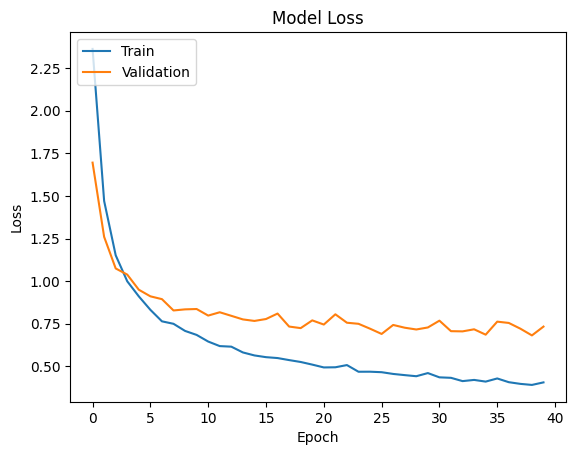

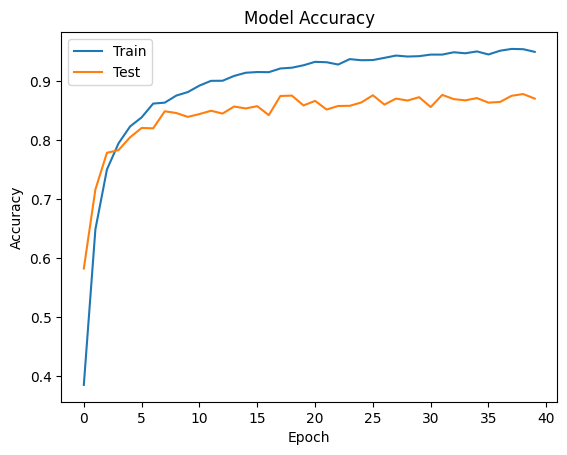

In [13]:
# Training the model using the training data and labels
history = model.fit(image_train, lable_train, batch_size=128, epochs=40, verbose=1, validation_data=(image_test, lable_test))

# Evaluating the model on the test data
loss, accuracy = model.evaluate(image_test, lable_test, batch_size=128)
print('Test loss:', loss * 100, '%')
print('Test accuracy:', accuracy * 100, '%')

# Plotting training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plotting training and validation accuracy values
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Although the test results improved somewhat, they were still insufficient. Notably, the significant loss rate that was seen can be linked to the neural network architecture's use of a restricted number of layers.After a thorough study, it is discovered that the existing network setup is not deep enough to identify the complex patterns seen in the data, which results in less than ideal performance.

### <font color='black'>3.1.2 Module C:</font>

Since the test results above did not meet our expectations, we decided to expand the neural network's layer count in order to improve its capacity to extract and represent information. This could potentially reduce the loss rate experienced and improve the test results overall. The alterations that followed were made:

added a layer called MaxPooling2D with a 3x3 pool.

added a third Conv2D layer with 128 filters that were 3x3 in size.

included 256 neurons in a Dense layer with ReLU activation. The input vector is transformed linearly by this completely connected layer.

In [14]:
# Creating a Convolutional Neural Network (CNN) model B
model1 = Sequential([
    # First Convolutional Layer with 32 filters, kernel size 3x3, 'same' padding, and ReLU activation
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32, 32, 1)),

    # MaxPooling layer with pool size 2x2
    MaxPooling2D(2, 2),

    # Second Convolutional Layer with 64 filters, kernel size 3x3, 'same' padding, and ReLU activation
    Conv2D(64, 3, padding='same', activation='relu'),

    # MaxPooling layer with pool size 2x2
    MaxPooling2D(3, 3),

    # Third Convolutional Layer with 128 filters, kernel size 3x3, 'same' padding, and ReLU activation
    Conv2D(128, 3, padding='same', activation='relu'),

    # Flattening the output for input to Dense layers
    Flatten(),

    # Second Dense (fully connected) layer with 256 neurons and ReLU activation
    Dense(256, activation='relu'),

    # Output Dense layer with neurons equal to total number of classes and softmax activation for multi-class classification
    Dense(total_classes, activation='softmax',kernel_regularizer=l2(0.01))
])

# Compiling the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/40
105/105 [==============================] - 3s 11ms/step - loss: 2.1449 - accuracy: 0.4426 - val_loss: 1.1738 - val_accuracy: 0.6860
Epoch 2/40
105/105 [==============================] - 1s 8ms/step - loss: 0.9070 - accuracy: 0.7704 - val_loss: 0.7505 - val_accuracy: 0.8226
Epoch 3/40
105/105 [==============================] - 1s 8ms/step - loss: 0.6395 - accuracy: 0.8501 - val_loss: 0.5807 - val_accuracy: 0.8702
Epoch 4/40
105/105 [==============================] - 1s 8ms/step - loss: 0.4755 - accuracy: 0.8971 - val_loss: 0.5106 - val_accuracy: 0.8899
Epoch 5/40
105/105 [==============================] - 1s 7ms/step - loss: 0.3988 - accuracy: 0.9161 - val_loss: 0.4496 - val_accuracy: 0.9039
Epoch 6/40
105/105 [==============================] - 1s 6ms/step - loss: 0.3399 - accuracy: 0.9292 - val_loss: 0.4193 - val_accuracy: 0.9057
Epoch 7/40
105/105 [==============================] - 1s 7ms/step - loss: 0.2831 - accuracy: 0.9493 - val_loss: 0.3817 - val_accuracy: 0.9232
Epoch

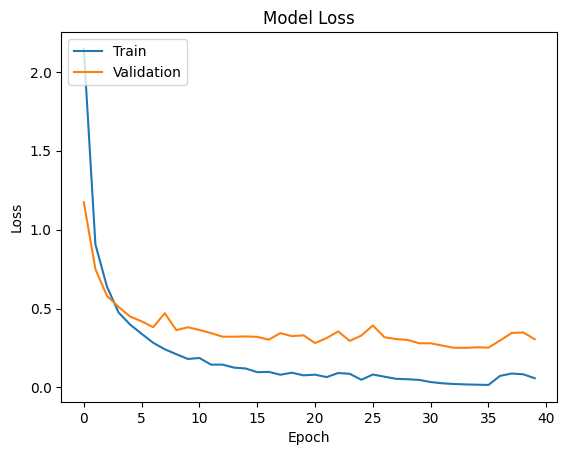

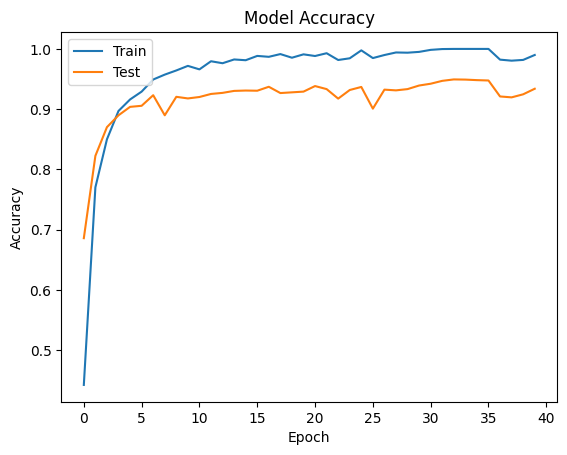

In [15]:
# Training the model using the training data and labels
history2 = model1.fit(image_train, lable_train, batch_size=128, epochs=40, verbose=1, validation_data=(image_test, lable_test))

# Evaluating the model on the test data
loss, accuracy = model1.evaluate(image_test, lable_test, batch_size=128)
print('Test loss:', loss * 100, '%')
print('Test accuracy:', accuracy * 100, '%')

# Plotting training and validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plotting training and validation accuracy values
plt.figure()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


The accuracy rate has gone up and the loss rate has gone down based on earlier findings. This development implies that the network's ability to learn has improved with the addition of more layers.

**Loss Curves:** The training loss decreases over epochs, indicating that the model is learning from the training data. The validation loss provides insight into the model's generalization performance.


**Accuracy Curves:** The training accuracy increases over epochs, showing that the model is improving its ability to correctly classify the training data. The validation accuracy provides information on how well the model generalizes to unseen data.

## <font color='black'>3.2 Task 2:</font>

In this task,  use the same network architecture, optimizer, loss function, and evaluation metrics as in Task 1, but we modify the code to include data augmentation to increase the size of the dataset using the Keras ImageDataGenerator class.

Data augmentation is a technique that can improve the performance and generalization of model by creating new and diverse data points from the existing ones. By applying various transformations, such as rotation, scaling, cropping, flipping, etc., to the original images, you can increase the size and the variety of your training data and reduce the risk of overfitting.

In [16]:
# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,  # rotate images randomly up to 10 degrees
    width_shift_range=0.2,  # shift images horizontally by up to 20% of the width
    zoom_range=0.3,  # zoom in by up to 20%
    fill_mode='nearest' , # fill in newly created pixels with the nearest pixel value
)

**Parameters used:**

Based on the data characteristics, I applied these parameters with different ratios :

* rotation_range: Randomly rotates the images up to 10 degrees.
* width_shift_range: Randomly shifts the images horizontally up to 20% of the width.
* zoom_range: Randomly zooms into the images up to 30%.
* fill_mode: 'nearest' (fills new pixels with the nearest original pixel value).

Epoch 1/40
105/105 [==============================] - 6s 53ms/step - loss: 0.6048 - accuracy: 0.8299 - val_loss: 0.2765 - val_accuracy: 0.9268
Epoch 2/40
105/105 [==============================] - 4s 41ms/step - loss: 0.4402 - accuracy: 0.8688 - val_loss: 0.2253 - val_accuracy: 0.9429
Epoch 3/40
105/105 [==============================] - 5s 45ms/step - loss: 0.3678 - accuracy: 0.8935 - val_loss: 0.2240 - val_accuracy: 0.9387
Epoch 4/40
105/105 [==============================] - 5s 50ms/step - loss: 0.3366 - accuracy: 0.8998 - val_loss: 0.1921 - val_accuracy: 0.9557
Epoch 5/40
105/105 [==============================] - 6s 53ms/step - loss: 0.3147 - accuracy: 0.9084 - val_loss: 0.1921 - val_accuracy: 0.9545
Epoch 6/40
105/105 [==============================] - 4s 41ms/step - loss: 0.2904 - accuracy: 0.9174 - val_loss: 0.2025 - val_accuracy: 0.9524
Epoch 7/40
105/105 [==============================] - 4s 41ms/step - loss: 0.2709 - accuracy: 0.9207 - val_loss: 0.1995 - val_accuracy: 0.9530

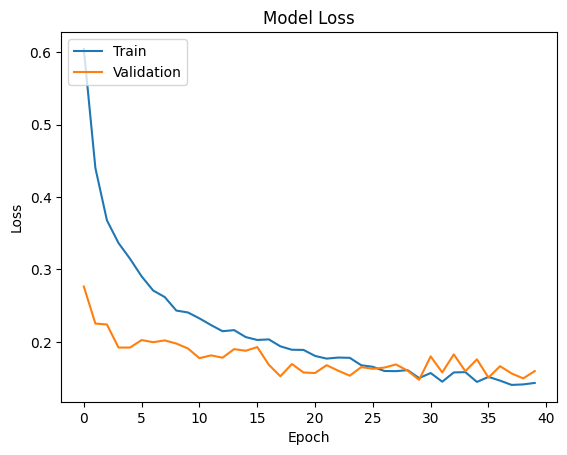

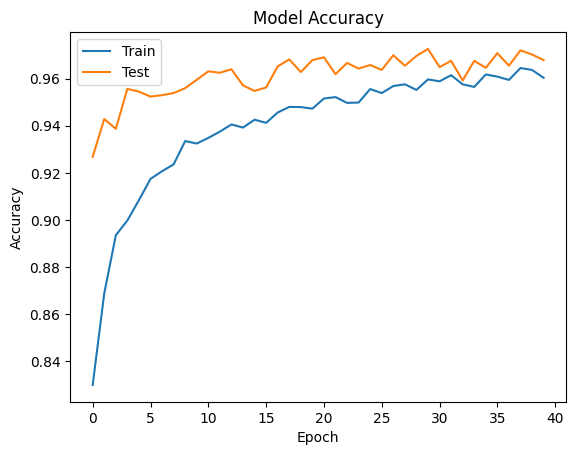

In [17]:
# Training the model with data augmentation using ImageDataGenerator
historyy = model1.fit(
    datagen.flow(image_train, lable_train, batch_size=128),  # Data augmentation during training
    steps_per_epoch=len(image_train) // 128,
    epochs=40,
    validation_data=(image_test, lable_test)
)

# Evaluating the model on the test data
loss, accuracy = model1.evaluate(image_test, lable_test, batch_size=128)
print('Test loss:', loss * 100, '%')
print('Test accuracy:', accuracy * 100, '%')

# Plotting training and validation loss values
plt.plot(historyy.history['loss'])
plt.plot(historyy.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plotting training and validation accuracy values
plt.figure()
plt.plot(historyy.history['accuracy'])
plt.plot(historyy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**The results of the evaluation are as follows:**

- The model achieves a higher accuracy and a lower loss on both the training and validation sets, which indicates that the model is better fitted to the data and does not suffer from overfitting or underfitting.

- The model shows a faster improvement in both accuracy and loss as the number of epochs increases, which suggests that the model is learning more effectively from the data and converging to an optimal solution.

- The data augmentation techniques used are effective for the Arabic Handwritten Characters Dataset, as they increase the diversity and size of the training data and help the model generalize better to unseen images. The data augmentation techniques also prevent the model from memorizing the exact pixel values of the images, and force it to learn more robust and invariant features.

**comparison the results in Task 2 and the results in Task 1**
- The model in Task 2 has a lower test loss and a higher test accuracy than the model in Task 1, which means that the model in Task 2 makes fewer errors and predicts more correctly on the test set.

- The model in Task 2 also has a lower training loss and a higher training accuracy than the model in Task 1, which indicates that the model in Task 2 learns better from the training data .

- The accuracy and loss curves for the model in Task 2 show a faster and smoother improvement than the curves for the model in Task 1, which suggests that the model in Task 2 converges more quickly and stably to an optimal solution.

- The data augmentation techniques used in Task 2 are effective for improving the performance and generalization of the model, as they increase the size and diversity of the training data and help the model learn more robust and invariant features.

## <font color='black'>3.3 Task 3:</font>

In this task, we aim to explore the use of well-known and published CNN architectures [AlexNet] for the problem of Arabic Handwritten Character Recognition (AHCR).  We will also apply the data augmentation techniques that we used in Task 2 to enhance the training data and improve the generalization performance of the models. By doing so, we hope to find the best tradeoff between accuracy and complexity for the AHCR task.



In [18]:
#creating Alexnet model
modelr=Sequential()

#1st convolution layer
modelr.add(Conv2D(filters=96, input_shape=(32,32,1), kernel_size=(11,11), strides=(4,4), padding='same', activation='relu'))

modelr.add(BatchNormalization())

#maxpooling layer 1
modelr.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#2nd convolutional layer
modelr.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))

modelr.add(BatchNormalization())

#maxpooling layer 2
modelr.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#3rd convolutional layer
modelr.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
modelr.add(BatchNormalization())

#4th convolutional layer
modelr.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
modelr.add(BatchNormalization())

#5th convolutional layer
modelr.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

#maxpooling layer 3
modelr.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#going for the fully connected layers
modelr.add(Flatten())

#1 Dense/Fully-connected layer
modelr.add(Dense(4096, input_shape=(32,32,1),activation='relu'))
#add dropout
modelr.add(Dropout(0.5))



#2 Dense/Fully-connected layer
modelr.add(Dense(4096,activation='relu'))
#add dropout
modelr.add(Dropout(0.5))


#output layer
modelr.add(Dense(29,activation='softmax'))
modelr.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/40
105/105 [==============================] - 13s 66ms/step - loss: 2.5997 - accuracy: 0.1912 - val_loss: 5.6614 - val_accuracy: 0.0357
Epoch 2/40
105/105 [==============================] - 5s 47ms/step - loss: 1.5498 - accuracy: 0.4387 - val_loss: 9.2435 - val_accuracy: 0.0399
Epoch 3/40
105/105 [==============================] - 5s 49ms/step - loss: 1.1126 - accuracy: 0.6091 - val_loss: 3.5690 - val_accuracy: 0.1381
Epoch 4/40
105/105 [==============================] - 6s 56ms/step - loss: 0.9129 - accuracy: 0.6917 - val_loss: 2.0898 - val_accuracy: 0.3774
Epoch 5/40
105/105 [==============================] - 5s 44ms/step - loss: 0.7847 - accuracy: 0.7394 - val_loss: 1.6913 - val_accuracy: 0.4735
Epoch 6/40
105/105 [==============================] - 6s 61ms/step - loss: 0.6837 - accuracy: 0.7750 - val_loss: 0.7097 - val_accuracy: 0.7592
Epoch 7/40
105/105 [==============================] - 5s 44ms/step - loss: 0.6271 - accuracy: 0.7937 - val_loss: 0.5905 - val_accuracy: 0.797

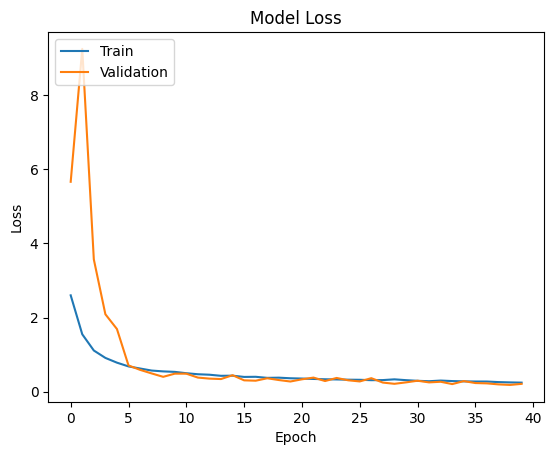

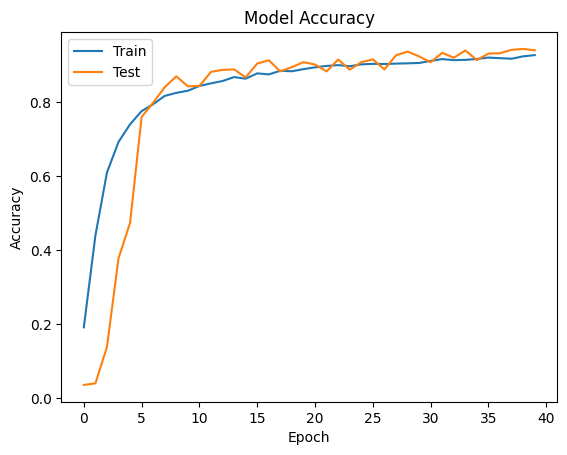

In [19]:
# Training the model with data augmentation using ImageDataGenerator
historyr = modelr.fit(
    datagen.flow(image_train, lable_train, batch_size=128),  # Data augmentation during training
    steps_per_epoch=len(image_train) // 128,
    epochs=40,
    validation_data=(image_test, lable_test)
)

# Evaluating the model on the test data
loss, accuracy = modelr.evaluate(image_test, lable_test, batch_size=128)
print('Test loss:', loss * 100, '%')
print('Test accuracy:', accuracy * 100, '%')

# Plotting training and validation loss values
plt.plot(historyr.history['loss'])
plt.plot(historyr.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plotting training and validation accuracy values
plt.figure()
plt.plot(historyr.history['accuracy'])
plt.plot(historyr.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


The results show that the overfitting caused by the excessive number of layers in task 3 caused the model to perform less efficiently than the models in previous tasks.

Numerous criteria, including the number of layers, the number of filters, the size of the kernel, the padding, the activation function, and the output form, should be considered. The efficiency, complexity, and performance of the model are influenced by these variables.

## <font color='black'>3.4 Task 4:</font>

In this task, we focus on deep learning and Convolutional Neural Networks (CNNs). We use transfer learning to adapt a pre-trained CNN model to our specific task. Our aim is to enhance the model's accuracy on our dataset.


Our goal was to use a pre-trained CNN network that can recognize the English alphabet. To achieve this, we fine-tuned the network by adding a new layer with the code: model.add(Dense(128, activation=‘relu’)) model.add(Dropout(0.25)) We also changed the output layer to have num of claces units and an activation function of our choice: model.add(Dense(29, activation=activation))

In [26]:
# Define the custom metric function
def top_3_categorical_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

# Load the model with the custom metric function
loaded_model = load_model('/content/drive/MyDrive/model.h5', custom_objects={'top_3_categorical_accuracy': top_3_categorical_accuracy})

def CNN_model(activation = 'softmax',
              loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy', top_3_categorical_accuracy]):

    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3),
                     activation = 'relu',
                     input_shape = (32,32,1)))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Conv2D(128, (4, 4), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.25))

    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.25))

    model.add(Dense(29, activation = activation))

    # Compile the model
    model.compile(loss = loss,
                  optimizer = optimizer,
                  metrics = metrics)

    return model



Epoch 1/100
104/105 [============================>.] - ETA: 0s - loss: 2.8007 - accuracy: 0.1704 - top_3_categorical_accuracy: 0.3701
Epoch 1: val_loss improved from inf to 1.43319, saving model to weights.best.letters.hdf5
105/105 [==============================] - 7s 48ms/step - loss: 2.7962 - accuracy: 0.1717 - top_3_categorical_accuracy: 0.3717 - val_loss: 1.4332 - val_accuracy: 0.5390 - val_top_3_categorical_accuracy: 0.8485 - lr: 0.0010
Epoch 2/100
105/105 [==============================] - ETA: 0s - loss: 1.7820 - accuracy: 0.4108 - top_3_categorical_accuracy: 0.7293
Epoch 2: val_loss improved from 1.43319 to 0.85980, saving model to weights.best.letters.hdf5
105/105 [==============================] - 6s 56ms/step - loss: 1.7820 - accuracy: 0.4108 - top_3_categorical_accuracy: 0.7293 - val_loss: 0.8598 - val_accuracy: 0.6982 - val_top_3_categorical_accuracy: 0.9408 - lr: 0.0010
Epoch 3/100
104/105 [============================>.] - ETA: 0s - loss: 1.3374 - accuracy: 0.5491 - top

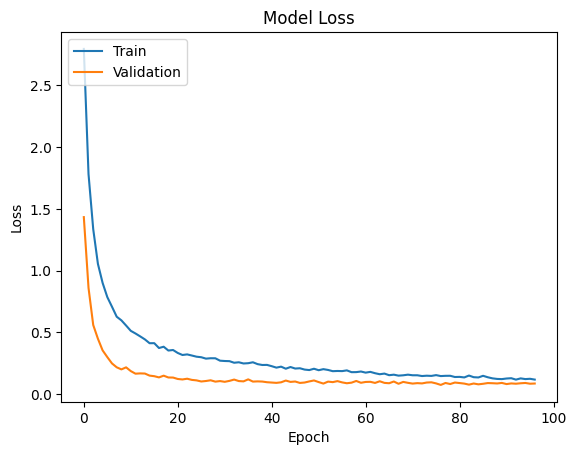

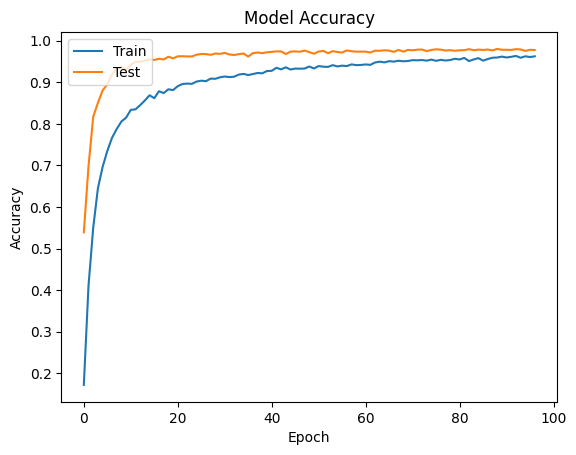

In [27]:
# Init CNN model
cnn_model = CNN_model()

# Save weights only for best model
checkpointer = ModelCheckpoint(filepath = 'weights.best.letters.hdf5',
                               verbose = 2,
                               save_best_only = True)

# Reduce learning rate when a metric has stopped improving
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                 patience=10,
                                 verbose=2,
                                 factor=.75)

# If score doesn't improve during patience=20 epochs, stop learning
estopping = EarlyStopping(monitor='val_loss',
                          patience=20,
                          verbose=2)

# Training
history4 = cnn_model.fit(datagen.flow(image_train, lable_train, batch_size=64),
                        batch_size = 64,
                        epochs = 100,
                        verbose = 1,
                        validation_data = (image_test, lable_test),
                        callbacks = [checkpointer, lr_reduction, estopping])
# Evaluating the model on the test data
loss, accuracy,_ = cnn_model.evaluate(image_test, lable_test, batch_size=128)
print('Test loss:', loss * 100, '%')
print('Test accuracy:', accuracy * 100, '%')

# Plotting training and validation loss values
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plotting training and validation accuracy values
plt.figure()
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The task's outcomes indicate superior performance compared to previous tasks. This can be attributed to the inherent challenge of constructing a neural network from scratch, which demands numerous experiments for satisfactory results. In contrast, pre-trained CNN networks, having been trained on a robust dataset, deliver improved outcomes.